In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
from matplotlib import pyplot as plt
import time

### Exercise 2.1

In [3]:
A = 1                
alpha = 0.35         
beta = 0.442        
delta = 0.6415      
sigma = 3           
nvec = np.array([1, 1, 0.2])       
f_params = (nvec, A, alpha, delta) 

In [5]:
def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    K = np.sum(bvec_guess)
    L = np.sum(nvec)
    r = A * alpha * ((L / K) ** (1 - alpha)) - delta
    w = A * (1 - alpha) * ((K / L) ** alpha)
    c1 = w * nvec[0] - bvec_guess[0]
    c2 = w * nvec[1] + (1 + r) * bvec_guess[0] - bvec_guess[1]
    c3 = w * nvec[2] + (1 + r) * bvec_guess[1]
    return ((c1 <= 0) or (c2 <= 0),  (c2 <= 0) or (c3 <=0)), (c1 <= 0, c2 <= 0, c3 <=0), (K <= 0)

In [11]:
print('a.',feasible(f_params, np.array([1.0, 1.2])),'-- Period 1 constraint is violated.')
print('b.',feasible(f_params, np.array([0.06, -0.001])),'-- No constraint is violated.')
print('c.',feasible(f_params, np.array([0.1, 0.1])),'-- No constraint is violated.')

a. ((True, False), (True, False, False), False) -- Period 1 constraint is violated.
b. ((False, False), (False, False, False), False) -- No constraint is violated.
c. ((False, False), (False, False, False), False) -- No constraint is violated.


### Exercise 2.2
#### a.b.

In [32]:
def get_eul_err(bvec, f_params):
    nvec, A, alpha, delta, beta = f_params
    b2, b3 = bvec
    L = np.sum(nvec)
    K = np.sum(bvec)
    r = A * alpha * ((L / K) ** (1 - alpha)) - delta
    w = A * (1 - alpha) * ((K / L) ** alpha)
    c1 = w * nvec[0] - bvec_guess[0]
    c2 = w * nvec[1] + (1 + r) * bvec_guess[0] - bvec_guess[1]
    c3 = w * nvec[2] + (1 + r) * bvec_guess[1]
    err1 = (w - b2) ** (-sigma)  - beta * (1 + r) * (w + (1 + r) * b2 - b3) ** (-sigma)
    err2 = (w + (1 + r) * b2 - b3) ** (-sigma) - beta * (1 + r) * (0.2 * w + (1 + r) * b3) ** (-sigma)
    return np.array([err1, err2])

def get_SS(params, bvec_guess, SS_graphs=False):  
    start_time = time.time()
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    f_params = np.array([nvec, A, alpha, delta, beta])
    result = optimize.root(get_eul_err, bvec_guess, args =f_params)
    b_ss = result.x 
    b2, b3 = b_ss
    K_ss = b2+b3
    r_ss = A * alpha * ((L / K_ss) ** (1 - alpha)) - delta
    Y_ss = A * K_ss ** alpha * L **(1 - alpha)
    w_ss = A * (1 - alpha) * ((K_ss / L) ** alpha)
    c1 = w_ss * nvec[0] - b2
    c2 = w_ss * nvec[1] + (1 + r_ss) * b2- b3
    c3 = w_ss * nvec[2] + (1 + r_ss) * b3
    c_ss = np.array([c1, c2, c3])
    C_ss = c_ss.sum()
    EulErr_ss = result.fun
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    ss_time = time.time() - start_time
    
    ss_output = {'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
    'ss_time': ss_time}
        
    if SS_graphs:
        fig, ax = plt.subplots()
        ax.plot((1,2,3), c_ss,marker = '.',  label = 'Consumptions')
        ax.plot((2,3), b_ss,marker = '.',  label = 'Savings')
        ax.legend()
        ax.set_title('Steady State Consumptions and Savings')
        plt.show()
    return ss_output

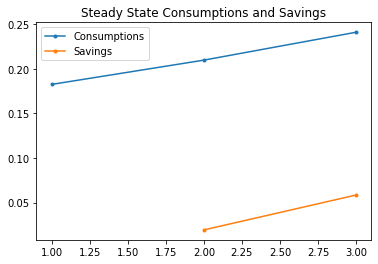

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.000997304916381836}

In [38]:
SS_tol = 1e-10
params = [beta, sigma, nvec, nvec.sum(), A, alpha, delta, SS_tol]
ss_output=get_SS(params, np.array([0.1, 0.1]), SS_graphs=True)
ss_output

#### C.

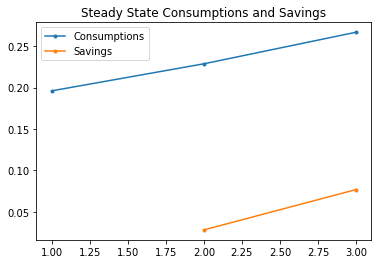

{'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'w_ss': 0.22415219593446706,
 'r_ss': 1.8863765057189819,
 'K_ss': 0.1050423702259807,
 'Y_ss': 0.7586689708551193,
 'C_ss': 0.6912842903551526,
 'EulErr_ss': array([6.87805368e-12, 2.52953214e-12]),
 'RCerr_ss': 9.71445146547012e-17,
 'ss_time': 0.0009648799896240234}

In [36]:
params2 = [0.55, sigma, nvec, nvec.sum(), A, alpha, delta, SS_tol]
get_SS(params2, np.array([0.1, 0.1]), SS_graphs=True)

From the plot, we can see that when $\beta$ increases, consumptions $\bar{c}$, saving $\bar{b}$, and wage $\bar{w}$ all increase, and only the interest rate $\bar{r}$ decreases. 
When the discount rate is higher, households will put more value in future than in the present, which leads to more savings for the future, and  the interest rate will decrease. As firms will rent more capital, and help workers produce more, there will be higher wage and therefore higher consumptions. 


### Exercise 3.
#### a.

In [45]:
def timepath(K_path_update, K_init, K_ss, T, A, alpha, delta, nvec, m, Type):
    path = np.zeros([T + m, 4])
    period_path  = np.arange(1, T + m +1)
    if Type == "linear":
        K_path = np.linspace(K_init, K_ss, num = T)
    if Type == "update":
        K_path = K_path_update
    path[: , 0] = period_path
    path[: -m, 1] = K_path
    path[-m: , 1] = K_ss
    path[: , 2] = get_w(path[: , 1], nvec.sum(), alpha, A)
    path[: , 3] = get_r(path[: , 1], nvec.sum(), alpha, delta, A)
    return path

get_cons = lambda b_s, b_s_1, n_s, r, w: w * n_s + (1 + r) * b_s - b_s_1
get_MU = lambda c, sigma=3: c ** (-sigma)
get_w = lambda K, L, alpha, A: A * (1 - alpha) * ((K / L) ** alpha)
get_Y = lambda K, L, alpha, A: A * (K ** alpha) * (L ** (1-alpha))
get_r = lambda K, L, alpha, delta, A : A * alpha * ((L / K) ** (1 - alpha)) - delta
def get_eul_err(bvec, *args):
    w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec = args
    b2, b3 = bvec
    L = nvec.sum()
    K = b2+b3
    c1 = get_cons(0, b2, nvec[0], r2, w1)
    c2 = get_cons(b2, b3, nvec[1], r2, w2)
    c3 = get_cons(b3, 0, nvec[2], r3, w3)
    MU1 = get_MU(c1)
    MU2 = get_MU(c2)
    MU3 = get_MU(c3)
    Eul1 = MU1 - beta*(1+r2) * MU2
    Eul2 = MU2 - beta*(1+r3) * MU3
    Euler_errs = np.array([Eul1, Eul2])
    return Euler_errs

def get_b32(b32, *args):
    r2, r3, b21, w2, w3, beta, sigma, nvec = args
    c2  = get_cons(b21, b32, nvec[1], r2, w2)
    c3  = get_cons(b32, 0, nvec[2], r3, w3)
    MU2 = get_MU(c2)
    MU3 = get_MU(c3)
    error =  MU2 - beta * (1 + r3) * MU3
    return error

def solve_path(path, *args):
    bvec_init_val, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init_val
    b32_init = 0.1
    b32_args  = (path[0 , 3], path[1 , 3], b_mat[0 , 0], path[0 , 2], path[1 , 2], beta, sigma, nvec)
    b32 = optimize.root(get_b32, b32_init, args = (b32_args))
    b32 = b32.x
    b_mat[1 , 1] = b32
    for i in range(path.shape[0]-2):
        w1 = path[i - 1 , 2]
        w2 = path[i , 2]
        w3 = path[i + 1 , 2]
        r2 = path[i , 3]
        r3 = path[i + 1, 3]
        ts_args = (w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec)
        bvec_ts = optimize.root(get_eul_err, bvec_init, args = (ts_args))
        b_mat[i , 0] = bvec_ts.x[0]
        b_mat[i + 1, 1] = bvec_ts.x[1]
    b_mat[: , 2] = b_mat[: , 0] + b_mat[: , 1]
    return b_mat

def TPI(path_init, xival, tol, *args):
    bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init
    b_HH_init  = solve_path(path_init, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
    diff_init = sum(((path_init[: -m, 1] - b_HH_init[: -m, 2])/path_init[: -m, 1])**2)
    if diff_init > tol:
        path = path_init
        b_HH = b_HH_init
        diff = diff_init
        iter_num = 0
        while diff > tol:
            update = xival * b_HH[: -m, 2] + (1 - xival) * path[: -m, 1]
            path = timepath(update, 0, K_ss, T, A, alpha, delta, nvec, m, "update")
            b_HH = solve_path(path, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
            diff = sum(((path[: -m, 1] - b_HH[: -m, 2])/path[: -m, 1])**2)
            iter_num = iter_num + 1
        result = (path, b_HH)
    else:
        result =  (path_init, b_HH_init)
    return result
xival = 0.1
tol = 1e-9
bvec_init = np.array([0.8 * ss_output['b_ss'][0], 1.1 * ss_output['b_ss'][1]])
T = 30
m = 25
bvec_ss = ss_output['b_ss']
K_ss = ss_output['K_ss']
K_init = bvec_init.sum()
path_init = timepath(0, K_init, K_ss, T, A, alpha, delta, nvec, m, "linear")
path = TPI(path_init, xival, tol,  bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss)
K_path = path[0][:, [0 , 1]]
w_path = path[0][:, [0 , 2]]
r_path = path[0][:, [0 , 3]]
b_path = path[1][:,:2]

get_eul_err_path = np.zeros((30, 2))
RCerr_path = np.zeros(30)
for i in range(30):
    if i == 0:
        rt = rt1 = r_path[0,1]
        wt = wt1 = w_path[0,1]
        b2t = b2t1 = b_path[0, 0]
        b3t = b3t1 = b_path[0, 1]
    else:
        rt, rt1 = r_path[i, 1], r_path[i-1, 1]
        b2t, b3t = b_path[i,:]
        b2t1, b3t1 = b_path[i-1, :]
        wt, wt1 = w_path[i,1], w_path[i-1, 1]
    Kt = K_path[i,1]
    Kt_1 = K_path[i+1, 1]
    Yt = get_Y(Kt, nvec.sum(), alpha, A)
    c1t = get_cons(0, b2t, nvec[0], rt, wt)
    c2t = get_cons(b2t1, b3t, nvec[1], rt1, wt)
    c3t = get_cons(b3t1, 0, nvec[2], rt1, wt)
    Ct = c1t + c2t + c3t
    RCerr_path[i] = Yt - Ct - Kt_1 + (1 - delta) * Kt
    get_eul_err_path[i, :] = get_eul_err(b_path[i, :], w_path[i,1], w_path[i+1,1], 
                               w_path[i+2,1], r_path[i+1,1], r_path[i+2,1], 
                               beta, alpha, delta, sigma, A, nvec)
print('Maximum of the absolute values of all the Euler errors:', np.abs(get_eul_err_path).max())
print('Maximum of the absolute values of all the resource constraint errors:', np.abs(RCerr_path).max())


Maximum of the absolute values of all the Euler errors: 37.40392243671714
Maximum of the absolute values of all the resource constraint errors: 0.00577342786005447


#### b.c.

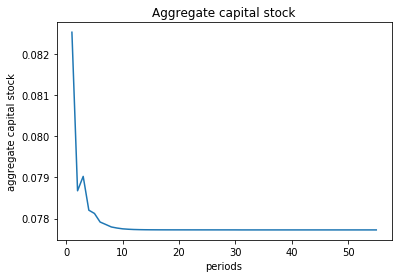

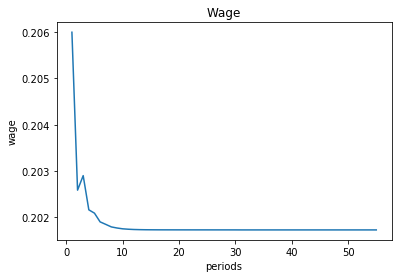

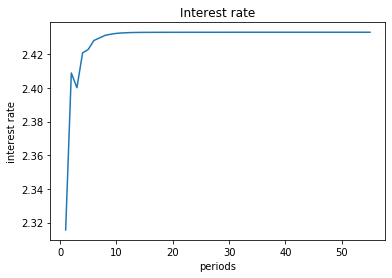

12 periods till getting within 0.00001 of the steady-state aggregate capital stock
12 periods till the aggregate capital stock never is again farther than 0.00001 away from the steady-state.


In [46]:
K_fig = plt.figure()
plt.plot(K_path[: , 0], K_path[: , 1])
plt.xlabel('periods')
plt.ylabel('aggregate capital stock')
plt.title('Aggregate capital stock')
plt.show()

w_fig = plt.figure()
plt.plot(w_path[: , 0], w_path[: , 1])
plt.xlabel('periods')
plt.ylabel('wage')
plt.title('Wage')
plt.show()


r_fig = plt.figure()
plt.plot(r_path[: , 0], r_path[: , 1])
plt.xlabel('periods')
plt.ylabel('interest rate')
plt.title('Interest rate')
plt.show()
    
for i in range(50):
    K = K_path[i, 1]
    if abs(K - K_ss) <= 1e-05:
        print('{} periods till getting within 0.00001 of the steady-state aggregate capital stock'.format(int(K_path[i, 0])))
        break
for i in range(50):
    K_mat = K_path[i:, 1]
    Diff = np.abs(K_mat - K_ss)
    if np.sum(Diff > 0.00001) == 0:
        print("{} periods till the aggregate capital stock never is again farther than 0.00001 away from the steady-state.".format(int(K_path[i, 0])))
        break